## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [77]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sqlite3
from IPython import display
from scipy import stats


In [78]:
conn = sqlite3.connect('Data/im.db')

In [79]:
cur = conn.cursor()

In [80]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")

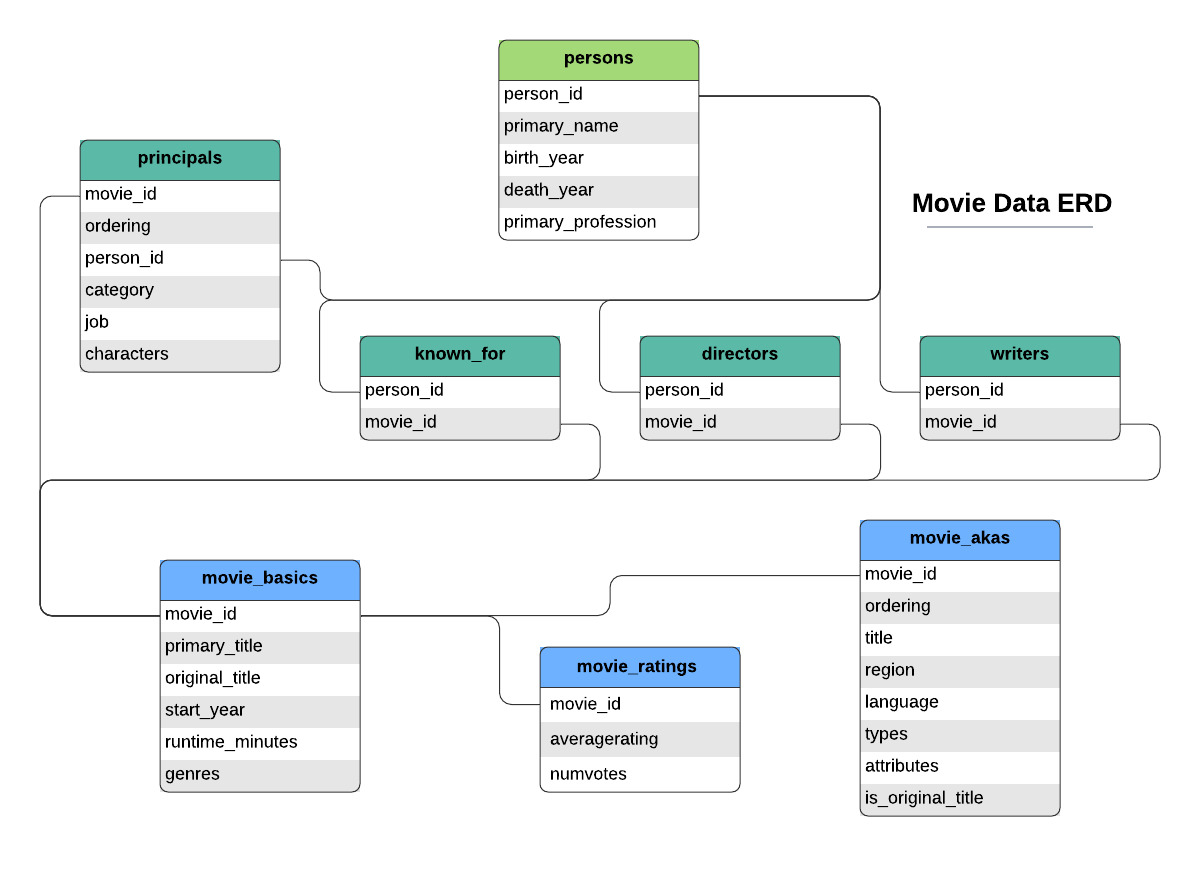

In [81]:
display.Image('data/movie_data_erd.jpeg')

In [82]:
table_names = pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type = "table";



""",conn)

In [83]:
table_names

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [84]:
#conn.close()

In [85]:
movie_basics = """
SELECT *
FROM movie_basics

"""

directors = """
SELECT *
FROM directors

"""

known_for = """
SELECT *
FROM known_for

"""


movie_akas = """
SELECT *
FROM movie_akas

"""


movie_ratings = """
SELECT *
FROM movie_ratings

"""



persons = """
SELECT *
FROM persons

"""


principals = """
SELECT *
FROM principals

"""


writers = """
SELECT *
FROM writers

"""


In [86]:
df_movie_basics = pd.read_sql(movie_basics,conn)

In [87]:
df_directors = pd.read_sql(directors,conn)

In [88]:
df_known_for = pd.read_sql(known_for,conn)

In [89]:
df_movie_akas = pd.read_sql(movie_akas,conn)

In [90]:
df_movie_ratings = pd.read_sql(movie_ratings,conn)

In [91]:
df_persons = pd.read_sql(persons,conn)

In [92]:
df_principals = pd.read_sql(principals,conn)

In [93]:
df_writers = pd.read_sql(writers,conn)

In [94]:
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [95]:
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [96]:
df_known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [97]:
df_movie_akas.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [98]:
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [99]:
df_persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [100]:
df_principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [101]:
df_writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [102]:
df_movie_basics.shape

(146144, 6)

In [103]:
df_movie_ratings.shape

(73856, 3)

In [104]:
df_movie_akas.shape

(331703, 8)

In [105]:
df_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


# Analyzing if there is a relationship between directors and movie rating

Join 4 tables: persons, directors,movie_basics, movie_ratings

In [106]:
df_persons.shape

(606648, 5)

In [107]:
Dir_Movie_ratings_DF = pd.read_sql(
"""
SELECT
DISTINCT per.person_id, per.primary_name, dir.movie_id,  mb.primary_title, mr.averagerating

FROM persons AS per
LEFT JOIN directors AS dir
    ON per.person_id = dir.person_id
LEFT JOIN movie_basics AS mb
    ON dir.movie_id = mb.movie_id
JOIN movie_ratings AS mr
    ON mb.movie_id = mr.movie_id


""",conn)

now this dataframe has all info from persons, directors, movie_basics, and movie ratings

In [108]:
Dir_Movie_ratings_DF.shape

(86030, 5)

In [109]:
Dir_Movie_ratings_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86030 entries, 0 to 86029
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      86030 non-null  object 
 1   primary_name   86030 non-null  object 
 2   movie_id       86030 non-null  object 
 3   primary_title  86030 non-null  object 
 4   averagerating  86030 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.3+ MB


In [110]:
Dir_Movie_ratings_DF.head()

,person_id,primary_name,movie_id,primary_title,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,Paano na kaya,6.4
1,nm0062879,Ruel S. Bayani,tt2057445,No Other Woman,6.4
2,nm0062879,Ruel S. Bayani,tt2590280,One More Try,5.8
3,nm0062879,Ruel S. Bayani,tt8421806,Kasal,7.9
4,nm0064023,Bryan Beasley,tt4512140,Not Such a Bad Guy: Conversations with Dabney ...,8.9


In [111]:
Dir_Movie_ratings_DF['Movie_Counts'] = 1

In [112]:
Dir_Movie_ratings_DF.head()

,person_id,primary_name,movie_id,primary_title,averagerating,Movie_Counts
0,nm0062879,Ruel S. Bayani,tt1592569,Paano na kaya,6.4,1
1,nm0062879,Ruel S. Bayani,tt2057445,No Other Woman,6.4,1
2,nm0062879,Ruel S. Bayani,tt2590280,One More Try,5.8,1
3,nm0062879,Ruel S. Bayani,tt8421806,Kasal,7.9,1
4,nm0064023,Bryan Beasley,tt4512140,Not Such a Bad Guy: Conversations with Dabney ...,8.9,1


In [113]:
Dir_vs_averagerating = Dir_Movie_ratings_DF[['primary_name','averagerating']].groupby('primary_name').agg(['median'])

In [114]:
Dir_vs_averagerating.head()

,averagerating
,median
primary_name,
A Normale Jef,7.2
A'Ali de Sousa,4.2
A. Blaine Miller,7.0
A. Cengiz Mert,3.2
A. Fishman,7.8


In [115]:
Dir_vs_averagerating.columns

MultiIndex([('averagerating', 'median')],
           )

In [116]:
Dir_vs_averagerating.shape

(56742, 1)

In [117]:
Dir_vs_averagerating = Dir_vs_averagerating.reset_index()

In [118]:
Dir_vs_averagerating.shape

(56742, 2)

In [119]:
Dir_Movie_ratings_DF.head()

,person_id,primary_name,movie_id,primary_title,averagerating,Movie_Counts
0,nm0062879,Ruel S. Bayani,tt1592569,Paano na kaya,6.4,1
1,nm0062879,Ruel S. Bayani,tt2057445,No Other Woman,6.4,1
2,nm0062879,Ruel S. Bayani,tt2590280,One More Try,5.8,1
3,nm0062879,Ruel S. Bayani,tt8421806,Kasal,7.9,1
4,nm0064023,Bryan Beasley,tt4512140,Not Such a Bad Guy: Conversations with Dabney ...,8.9,1


In [120]:
director_vs_moviecounts = Dir_Movie_ratings_DF.groupby('primary_name').sum().sort_values(by='Movie_Counts', ascending=False)

In [121]:
director_vs_moviecounts.head()

,averagerating,Movie_Counts
primary_name,,
Sergey A.,290.2,39
Nayato Fio Nuala,174.4,37
Larry Rosen,251.8,34
Dustin Ferguson,124.1,31
Jason Impey,166.3,30


In [122]:
DF1 = pd.merge(director_vs_moviecounts,Dir_vs_averagerating, on = "primary_name")

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [123]:
DF1.head()

,primary_name,averagerating,Movie_Counts,"(averagerating, median)"
0,Sergey A.,290.2,39,7.50
1,Nayato Fio Nuala,174.4,37,4.80
2,Larry Rosen,251.8,34,8.05
3,Dustin Ferguson,124.1,31,3.60
4,Jason Impey,166.3,30,5.60


In [124]:
DF1.describe()

,averagerating,Movie_Counts,"(averagerating, median)"
count,56742.000000,56742.000000,56742.000000
mean,9.612629,1.516161,6.438708
std,7.910691,1.291611,1.424472
min,1.000000,1.000000,1.000000
25%,6.100000,1.000000,5.600000
50%,7.300000,1.000000,6.600000
75%,9.800000,2.000000,7.400000
max,290.200000,39.000000,10.000000


In [137]:
[(column, type(column) ) for column in DF1.columns ]

[('primary_name', str),
 ('averagerating', str),
 ('Movie_Counts', str),
 (('averagerating', 'median'), tuple)]

In [142]:
DF1 = DF1.rename(columns = {('averagerating', 'Median'): 'averagerating_median'} )

In [143]:
DF1.columns

Index(['primary_name', 'averagerating', 'Movie_Counts',
       ('averagerating', 'median')],
      dtype='object')

In [133]:
DF1.head()

,primary_name,averagerating,Movie_Counts,"(averagerating, median)"
0,Sergey A.,290.2,39,7.50
1,Nayato Fio Nuala,174.4,37,4.80
2,Larry Rosen,251.8,34,8.05
3,Dustin Ferguson,124.1,31,3.60
4,Jason Impey,166.3,30,5.60


<AxesSubplot:ylabel='Movie_Counts'>

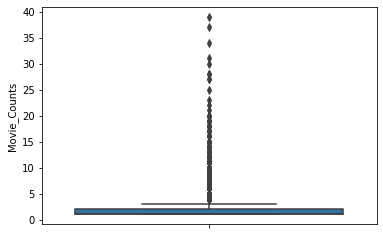

In [127]:
sns.boxplot(data = DF1, y='Movie_Counts', x= None, width=0.8)

                

<AxesSubplot:ylabel='Movie_Counts'>

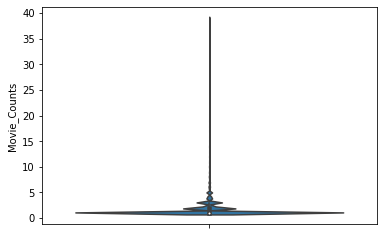

In [128]:
sns.violinplot(data=DF1, y="Movie_Counts")

In [129]:
DF1.Movie_Counts.median()

1.0

<AxesSubplot:xlabel='Movie_Counts', ylabel='Count'>

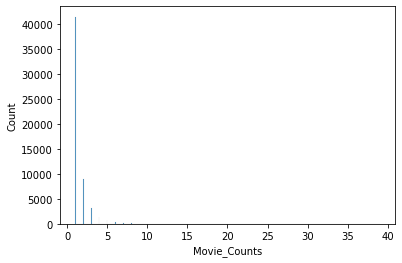

In [130]:
sns.histplot(data=DF1, x="Movie_Counts")

Conclusion: Looks like the median movie counts for most of the directors is 1. There are some outliers greater than 10??

Drop the outliers, do I have to normalize this distribution or make it normal in order to remove the outliers?

# Is there correlation between movie ratings and director movie made counts?

In [131]:
DF1.columns

Index(['primary_name', 'averagerating', 'Movie_Counts',
       ('averagerating', 'median')],
      dtype='object')

In [132]:
np.corrcoef(DF1['Movie_Counts'],DF1[('averagerating', 'median')] )


array([[ 1.        , -0.07377526],
       [-0.07377526,  1.        ]])


There is barely any correlation between the number of movies a director made to the movie ratings.
Therefore not pursuing this route.

In [57]:
DF1.to_csv('Director_Movie_counts_and_Rating.csv')

# Looking into correlation between budgets and gross

In [58]:
movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')

In [59]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [60]:
movie_gross = pd.read_csv('Data/bom.movie_gross.csv.gz')

In [61]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Below is work to compare gross in both movie_gross and movie_budget csv files:

In [62]:
movie_gross[movie_gross['title'] == 'Toy Story 3']

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


In [63]:
movie_budgets[movie_budgets['movie'] == 'Toy Story 3']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
46,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"


In [64]:
movie_gross[movie_gross['title'] == 'Inception']

,title,studio,domestic_gross,foreign_gross,year
3,Inception,WB,292600000.0,535700000,2010


In [65]:
movie_budgets[movie_budgets['movie'] == 'Inception']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
137,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"


Conclusion: domestic_gross + foreign_gross = worldwide_gross. Dats is not so much difference in the two files.

In [66]:
movie_info = pd.read_csv('Data/rt.movie_info.tsv.gz', delimiter = '\t')


In [67]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [68]:
Sample_SQL_DF = 
"""
SELECT
t1.col,
t1.col,
t2.col

FROM Table1 t1
JOIN Table2 t2
    ON t1.key = t2.key
WHERE
GROUP BY
HAVING
ORDER BY
LIMIT

"""

SyntaxError: invalid syntax (<ipython-input-68-7b8a5b5dd750>, line 1)

In [ ]:
# Read the CSV file
#movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv')
# Create a connection to the SQLite database
#conn = sqlite3.connect('data/im.db')
# Create a table from the movie_budgets DataFrame
#movie_budgets.to_sql('movie_budgets_table', conn, if_exists='replace', index=False)
# Define the SQL query to join the two tables
#sql_query = '''
   # SELECT mb.*, mg.*, LOWER(mb.primary_title) as lw_ptitle, LOWER(mg.title) as lw_title
   # --mb.primary_title, mb.start_year, mg.title, mg.year
    #FROM movie_basics mb
    #LEFT JOIN movie_gross_table mg 
    #ON LOWER(mb.primary_title) = LOWER(mg.title)
    
'''
# Execute the SQL query and fetch the results
#results = pd.read_sql(sql_query, conn)
# Close the database connection
# conn.close()
# Print the column names in the joined table
# print(results.columns